In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
np.random.seed(0)

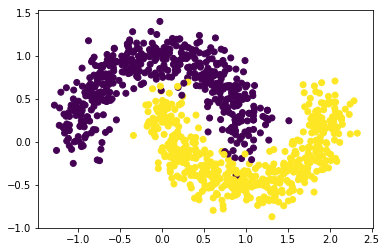

In [2]:
x, y = make_moons(n_samples=1000, noise=0.15)
y = np.atleast_2d(y).T
x_train, x_test, y_train, y_test = train_test_split(x, y)
plt.scatter(x[:,0], x[:,1], c=y[:,0])

Number of samples, input units, number of output units:

In [3]:
assert x_train.shape[0] == y_train.shape[0]
x_train.shape[0], x_train.shape[1], y_train.shape[1]

(750, 2, 1)

\begin{align*}
h_\Theta(x) &= a^{(j + 1)} \\
a^{(j)} &= g(z^{(j)}) \\
z^{(j)} &= \Theta^{(j - 1)}a^{(j - 1)}
\end{align*}

Where $g$ is an activation function applied element-wise, $a^{(1)} = x$ (the overall network input), and $a^{(j)}_0 = 1$ for a bias unit for all layers $j$.

In [4]:
def sigmoid(z, derivative=False):
    if derivative:
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

## Non-vectorized implementation without bias units

- Input layer has two units.
- Hidden layer has two units.
- Output layer has one unit.

In [5]:
x_train.shape, y_train.shape

((750, 2), (750, 1))

0.0378429152598


0.84

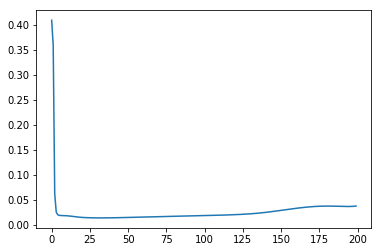

In [6]:
def a(weights, layer):
    z = weights.dot(layer)
    return sigmoid(z)


hidden_1_weights = np.random.random((4, 2))
hidden_2_weights = np.random.random((2, 4))
output_weights = np.random.random((1, 2))

costs = []
learning_rate = 0.1

for _ in range(200):
    for sample, known in zip(x_train, y_train):
        x = np.atleast_2d(sample).T
        y = np.atleast_2d(known).T
        hidden_1_output = a(hidden_1_weights, x)
        hidden_2_output = a(hidden_2_weights, hidden_1_output)
        output_output = a(output_weights, hidden_2_output)

        output_delta = y - output_output
        hidden_2_delta = output_weights.T.dot(output_delta) * sigmoid(hidden_2_output, derivative=True)
        hidden_1_delta = hidden_2_weights.T.dot(hidden_2_delta) * sigmoid(hidden_1_output, derivative=True)

        output_pd = output_delta.dot(hidden_2_output.T)
        hidden_2_pd = hidden_2_delta.dot(hidden_1_output.T)
        hidden_1_pd = hidden_1_delta.dot(x.T)

        output_weights += learning_rate * output_pd
        hidden_2_weights += learning_rate * hidden_2_pd
        hidden_1_weights += learning_rate * hidden_1_pd

    costs.append(output_delta[0][0] ** 2)
        
plt.plot(costs)
print(costs[-1])

correct = 0
for sample, known in zip(x_test, y_test):
    x = np.atleast_2d(sample).T
    hidden_1_output = a(hidden_1_weights, x)
    hidden_2_output = a(hidden_2_weights, hidden_1_output)
    output_output = a(output_weights, hidden_2_output)
    prediction = 1 if output_output[0][0] >= 0.5 else 0
    if prediction == known[0]:
        correct += 1
correct / len(x_test)